# Ingestão de dados

Aqui, pegamos os dados das diversas fontes (bases) e criamos uma base unificada com as informações disponíveis **sem processar, preencher nulos ou fazer algum tipo de data prep**

Path das bases de dados: `https://raw.githubusercontent.com/LeiteJu/TCC/main/dados/bases/`
- aqui estão os arquivos originais obtidos do IBGE, IPEA, CNIC, ...

Path da base única: `https://raw.githubusercontent.com/LeiteJu/TCC/main/dados/csv/base_unica.csv`

Na base única, manteremos apenas a sigla de cada estado, para evitar problemas com diferenças na grafia do nome dos estados (acento, til, ...)

In [236]:
# importamos as libs
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

In [ ]:
PATH="https://raw.githubusercontent.com/LeiteJu/TCC/main/dados/"

SIGLAS = ["AC","AL","AM","AP","BA","CE",
          "DF","ES","GO","MA","MG","MS",
          "MT","PA","PB","PE","PI","PR",
          "RJ","RN","RO","RR","RS","SC",
          "SE","SP","TO"]

ESTADOS = ['Acre', 'Alagoas', 'Amazonas', 'Amapá', 'Bahia', 'Ceará',
  'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
  'Minas Gerais', 'Mato Grosso do Sul', 'Mato Grosso', 'Pará', 'Paraíba',
  'Pernambuco', 'Piauí', 'Paraná', 'Rio de Janeiro',
  'Rio Grande do Norte', 'Rondônia', 'Roraima', 'Rio Grande do Sul',
  'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins']

MAP={'Acre':'AC', 'Alagoas':'AL', 'Amazonas':"AM", 'Amapá':'AP', 
        'Bahia':"BA", 'Ceará':"CE", 'Distrito Federal' : "DF", 
        'Espírito Santo':'ES', 'Goiás':'GO', 'Maranhão':'MA',
        'Minas Gerais' : 'MG', 'Mato Grosso do Sul': 'MS', 
        'Mato Grosso' : 'MT', 'Pará':'PA', 'Paraíba':'PB', 'Pernambuco': 'PE', 
        'Piauí':'PI', 'Paraná' : 'PR', 'Rio de Janeiro' : 'RJ',
        'Rio Grande do Norte' : 'RN', 'Rondônia' : 'RO', 'Roraima' : 'RR', 
        'Rio Grande do Sul' : 'RS', 'Santa Catarina' : 'SC', 
        'Sergipe' : 'SE', 'São Paulo' : 'SP', 'Tocantins' : 'TO'}

In [ ]:
df = pd.DataFrame(SIGLAS*35*12, columns=["estados"]).sort_values("estados").reset_index(drop=True)

In [ ]:
init=pd.to_datetime('011985', format='%m%Y')
end=pd.to_datetime('122019', format='%m%Y')
df['data'] = pd.Series(pd.date_range(start=init, end=end, freq='MS')).to_list() * 27

In [ ]:
df.shape

(11340, 2)

In [ ]:
df.head()

,estados,data
0,AC,1985-01-01
1,AC,1985-02-01
2,AC,1985-03-01
3,AC,1985-04-01
4,AC,1985-05-01


In [ ]:
def search_duplicates(df):
    print(f"Todas as datas repetem 27 vezes? {(df['data'].value_counts() == 27).all()}")
    print(f"Estados unicos: {df['estados'].nunique()}")
    print(f"Shape: {df.shape}")
    print(f"Duplicados? {df.duplicated().any()}")

In [ ]:
(df["data"].value_counts() == 27).all()

True

In [ ]:
df["estados"].nunique()

27

# PIB dos estados a preços constantes

- Fonte: IBGE
- Link: ipeadata
- Granularidade: anual por estado

In [141]:
pib_pc = pd.read_csv(f"{PATH}bases/pib_precos_constantes.csv")

In [142]:
pib_pc.head()

,Sigla,Código,Estado,1985,1986,1987,1988,1989,1990,1991,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 38
0,AC,12,Acre,3.263960e+06,3.313102e+06,3.207432e+06,3.325104e+06,3.452815e+06,3.579888e+06,3.757043e+06,...,7.538215e+06,7.825168e+06,8.340313e+06,9.109604e+06,8.533398e+06,7.929802e+06,7.856954e+06,8.073084e+06,7.931592e+06,NaN
1,AL,27,Alagoas,1.307516e+07,1.347157e+07,1.467704e+07,1.358056e+07,1.433203e+07,1.548758e+07,1.587761e+07,...,2.633893e+07,2.672619e+07,2.681694e+07,2.748898e+07,2.898202e+07,2.839164e+07,2.926273e+07,2.897591e+07,3.017589e+07,NaN
2,AM,13,Amazonas,1.268226e+07,1.357227e+07,1.414111e+07,1.547105e+07,1.615779e+07,1.616039e+07,1.627473e+07,...,5.456876e+07,5.095026e+07,5.474434e+07,5.303764e+07,4.985351e+07,4.815514e+07,4.804979e+07,4.999669e+07,5.162355e+07,NaN
3,AP,16,Amapá,2.396901e+06,2.556622e+06,2.586933e+06,2.623083e+06,2.747932e+06,2.785524e+06,2.935518e+06,...,8.047322e+06,8.766986e+06,9.352710e+06,9.126904e+06,8.840409e+06,8.544281e+06,8.858947e+06,9.283840e+06,9.288628e+06,NaN
4,BA,29,Bahia,5.417285e+07,5.803161e+07,5.999804e+07,7.078996e+07,6.578895e+07,7.000972e+07,7.215816e+07,...,1.345356e+08,1.362406e+08,1.418186e+08,1.447350e+08,1.481216e+08,1.448485e+08,1.445445e+08,1.484784e+08,1.459331e+08,NaN


In [143]:
pib_pc = pib_pc.drop(["Código", "Estado"], axis=1)
pib_pc = pib_pc.melt(id_vars=["Sigla"], value_vars=[f"{i}" for i in range (1985,2020)], value_name="pib_pc", var_name="data")

In [144]:
pib_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sigla   945 non-null    object 
 1   data    945 non-null    object 
 2   pib_pc  941 non-null    float64
dtypes: float64(1), object(2)
memory usage: 22.3+ KB


In [145]:
pib_pc["data"]=pd.to_datetime(pib_pc["data"], format="%Y")

In [146]:
pib_pc.columns=["estados", "data", "pib_pc"]

In [147]:
pib_pc.head()

,estados,data,pib_pc
0,AC,1985-01-01,3.263960e+06
1,AL,1985-01-01,1.307516e+07
2,AM,1985-01-01,1.268226e+07
3,AP,1985-01-01,2.396901e+06
4,BA,1985-01-01,5.417285e+07


In [148]:
pib_pc["pib_pc"] = pib_pc["pib_pc"] / 12

In [149]:
pib_pc.head()

,estados,data,pib_pc
0,AC,1985-01-01,2.719967e+05
1,AL,1985-01-01,1.089597e+06
2,AM,1985-01-01,1.056855e+06
3,AP,1985-01-01,1.997418e+05
4,BA,1985-01-01,4.514404e+06


In [150]:
df = pd.merge(df, pib_pc, how="left").fillna(method="ffill")

In [151]:
(df["data"].value_counts() == 27).all()

True

In [152]:
df["estados"].nunique()

27

In [153]:
df.shape

(11340, 3)

In [154]:
search_duplicates(df)

Todas as datas repetem 27 vezes? True
Estados unicos: 27
Shape: (11340, 3)
Duplicados? False


# PIB do estado de mercado corrente

- Fonte: IBGE
- Link: ipeadata
- Granularidade: anual por estado

In [155]:
pib_pmc = pd.read_csv(f"{PATH}bases/pib_precos_mercado_corrente.csv")

In [156]:
pib_pmc.head()

,Sigla,Código,Estado,1985,1986,1987,1988,1989,1990,1991,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 38
0,AC,12,Acre,0.000620,0.001771,0.005193,0.038876,0.547705,15.996393,80.808201,...,8.165288e+06,9.149380e+06,1.048352e+07,1.234899e+07,1.244313e+07,1.250000e+07,1.283566e+07,1.362206e+07,1.393929e+07,NaN
1,AL,27,Alagoas,0.004075,0.010037,0.033596,0.200712,2.458330,81.602266,428.900043,...,2.852996e+07,3.124893e+07,3.370809e+07,3.726409e+07,4.226066e+07,4.475466e+07,4.780562e+07,4.889228e+07,5.303229e+07,NaN
2,AM,13,Amazonas,0.007241,0.022455,0.072782,0.538409,7.521879,210.045517,1015.381910,...,5.910811e+07,5.957231e+07,6.881200e+07,7.189786e+07,7.269479e+07,7.590849e+07,7.849747e+07,8.436154e+07,9.072525e+07,NaN
3,AP,16,Amapá,0.000574,0.001458,0.004728,0.040189,0.764695,18.591401,96.910902,...,8.716746e+06,1.025058e+07,1.175608e+07,1.237244e+07,1.289080e+07,1.346862e+07,1.447259e+07,1.566502e+07,1.632420e+07,NaN
4,BA,29,Bahia,0.025442,0.065506,0.189984,1.404576,19.221150,518.982825,2652.432271,...,1.457271e+08,1.592959e+08,1.782617e+08,1.962028e+08,2.159861e+08,2.283293e+08,2.361379e+08,2.505338e+08,2.564685e+08,NaN


In [157]:
pib_pmc.drop(["Código", "Estado"], inplace=True, axis=1)
pib_pmc = pib_pmc.melt(id_vars=["Sigla"], value_vars=[f"{i}" for i in range (1985,2020)], value_name="pib_pmc", var_name="anos")

In [158]:
pib_pmc.head()

,Sigla,anos,pib_pmc
0,AC,1985,0.000620
1,AL,1985,0.004075
2,AM,1985,0.007241
3,AP,1985,0.000574
4,BA,1985,0.025442


In [159]:
pib_pmc["data"] = pd.to_datetime(pib_pc["data"], format="%Y")
pib_pmc["pib_pmc"] = pib_pmc["pib_pmc"] / 12

In [160]:
pib_pmc = pib_pmc.rename({"Sigla":"estados"}, axis=1)

In [161]:
pib_pmc = pib_pmc.drop("anos", axis=1)

In [162]:
df = pd.merge(df, pib_pmc, how="left").fillna(method="ffill")

In [163]:
df.head()

,estados,data,pib_pc,pib_pmc
0,AC,1985-01-01,271996.683911,0.000052
1,AC,1985-02-01,271996.683911,0.000052
2,AC,1985-03-01,271996.683911,0.000052
3,AC,1985-04-01,271996.683911,0.000052
4,AC,1985-05-01,271996.683911,0.000052


In [164]:
search_duplicates(df)

Todas as datas repetem 27 vezes? True
Estados unicos: 27
Shape: (11340, 4)
Duplicados? False


# PIB per capita

- Fonte: IBGE
- Link: ipeadata
- Granularidade: anual por estado

In [165]:
pib_pcpt =  pd.read_csv(f"{PATH}bases/pib_per_capita.csv")
pib_pcpt.head()

,Sigla,Código,Estado,1985,1986,1987,1988,1989,1990,1991,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 38
0,AC,12,Acre,9.215645,9.076744,8.537466,8.610980,8.402114,8.504651,8.723272,...,10.099619,10.312746,10.741417,11.529670,10.620112,9.709720,9.470557,9.287253,8.993397,NaN
1,AL,27,Alagoas,5.879142,5.925594,6.320284,5.730295,5.771642,6.124530,6.170056,...,8.379165,8.443036,8.124044,8.275502,8.674832,8.452503,8.668324,8.720275,9.041852,NaN
2,AM,13,Amazonas,7.306192,7.546578,7.601859,8.054953,7.828067,7.616238,7.471428,...,15.421931,14.188381,14.376439,13.691574,12.658521,12.033770,11.824399,12.252257,12.455625,NaN
3,AP,16,Amapá,10.554527,10.754808,10.423195,10.149562,9.718350,9.521564,9.716494,...,11.759778,12.549329,12.724844,12.154425,11.530783,10.922070,11.105306,11.192173,10.982957,NaN
4,BA,29,Bahia,5.134586,5.385667,5.456052,6.312963,5.609763,5.866089,5.945315,...,9.543200,9.611099,9.426834,9.568387,9.742704,9.481745,9.419988,10.023776,9.811905,NaN


In [166]:
pib_pcpt = pib_pcpt.drop(["Código", "Estado", 'Unnamed: 38'], axis=1)
pib_pcpt = pib_pcpt.melt(id_vars=["Sigla"], value_vars=[f"{i}" for i in range (1985,2020)], value_name="pib_pcpt", var_name="anos")

In [167]:
pib_pcpt['data'] = pd.to_datetime(pib_pcpt['anos'], format="%Y")
pib_pcpt = pib_pcpt.drop(['anos'], axis=1)

In [168]:
pib_pcpt["pib_pcpt"] = pib_pcpt["pib_pcpt"] / 12

In [169]:
pib_pcpt = pib_pcpt.rename({"Sigla":"estados"}, axis=1)

In [170]:
pib_pcpt.head()

,estados,pib_pcpt,data
0,AC,0.767970,1985-01-01
1,AL,0.489929,1985-01-01
2,AM,0.608849,1985-01-01
3,AP,0.879544,1985-01-01
4,BA,0.427882,1985-01-01


In [171]:
df = pd.merge(df, pib_pcpt, how="left").fillna(method="ffill")

In [172]:
search_duplicates(df)

Todas as datas repetem 27 vezes? True
Estados unicos: 27
Shape: (11340, 5)
Duplicados? False


# PIB da construção civil

- Fonte: IBGE
- Link: ipeadata
- Granularidade: anual por estado

In [173]:
pib_cc =  pd.read_csv(f"{PATH}bases/pib_construcao_civil.csv")
pib_cc.head()

,Sigla,Código,Estado,1985,1986,1987,1988,1989,1990,1991,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 38
0,AC,12,Acre,2.074864e+05,3.073232e+05,2.350580e+05,2.748413e+05,2.786433e+05,2.039486e+05,2.130618e+05,...,5.814337e+05,5.591640e+05,5.175694e+05,6.801141e+05,4.635291e+05,3.632690e+05,3.032005e+05,3.080581e+05,3.096874e+05,NaN
1,AL,27,Alagoas,1.094083e+06,1.648612e+06,1.675906e+06,1.661463e+06,1.320639e+06,1.140776e+06,8.737912e+05,...,1.958261e+06,1.846452e+06,1.859065e+06,1.823977e+06,1.458481e+06,1.459544e+06,1.293523e+06,1.188205e+06,1.097614e+06,NaN
2,AM,13,Amazonas,1.502130e+06,2.014757e+06,2.168534e+06,2.466623e+06,2.529082e+06,1.885088e+06,2.017014e+06,...,3.148854e+06,2.926015e+06,3.405730e+06,2.994511e+06,2.430038e+06,2.216941e+06,1.823895e+06,1.673511e+06,1.760398e+06,NaN
3,AP,16,Amapá,8.479147e+04,9.843820e+04,9.542397e+04,1.096430e+05,1.112544e+05,7.965913e+04,8.441434e+04,...,4.782305e+05,6.497477e+05,5.738301e+05,6.575904e+05,7.024214e+05,4.768975e+05,3.716279e+05,3.716938e+05,3.161351e+05,NaN
4,BA,29,Bahia,6.513353e+06,9.173761e+06,5.200354e+06,4.989453e+06,6.707817e+06,6.753978e+06,6.077555e+06,...,1.123077e+07,1.109462e+07,1.197595e+07,1.222309e+07,1.083619e+07,9.365402e+06,8.056606e+06,7.452787e+06,7.105524e+06,NaN


In [174]:
pib_cc.drop(["Código", "Estado"], inplace=True, axis=1)
pib_cc = pib_cc.melt(id_vars=["Sigla"], value_vars=[f"{i}" for i in range (1985,2020)], value_name="pib_cc", var_name="anos")
#df["pib_cc"] = pib_cc["pib_cc"]

In [175]:
pib_cc['data'] = pd.to_datetime(pib_cc['anos'], format="%Y")
pib_cc = pib_cc.drop(['anos'], axis=1)

In [176]:
pib_cc = pib_cc.rename({'Sigla':"estados"}, axis=1)

In [177]:
pib_cc.head()

,estados,pib_cc,data
0,AC,2.074864e+05,1985-01-01
1,AL,1.094083e+06,1985-01-01
2,AM,1.502130e+06,1985-01-01
3,AP,8.479147e+04,1985-01-01
4,BA,6.513353e+06,1985-01-01


In [178]:
df = pd.merge(df, pib_cc, how="left").fillna(method="ffill")

In [179]:
search_duplicates(df)

Todas as datas repetem 27 vezes? True
Estados unicos: 27
Shape: (11340, 6)
Duplicados? False


# População

- Fonte: IBGE
- Link: https://basedosdados.org/dataset/br-ibge-populacao
- Granularidade: anual por estado

In [180]:
pop = pd.read_csv(f"{PATH}bases/populacao.csv")

In [181]:
pop.head()

,ano,sigla_uf,populacao
0,1991,AC,417102
1,1991,AL,2512658
2,1991,AM,2102766
3,1991,AP,289035
4,1991,BA,11867336


In [182]:
pop["data"] = pd.to_datetime(pop["ano"], format="%Y")
pop=pop.drop("ano", axis=1)
pop = pop.rename({"sigla_uf":"estados"}, axis=1)

In [183]:
pop.head()

,estados,populacao,data
0,AC,417102,1991-01-01
1,AL,2512658,1991-01-01
2,AM,2102766,1991-01-01
3,AP,289035,1991-01-01
4,BA,11867336,1991-01-01


In [184]:
df = pd.merge(df, pop, how="left").fillna(method="ffill")

In [185]:
search_duplicates(df)

Todas as datas repetem 27 vezes? True
Estados unicos: 27
Shape: (11340, 7)
Duplicados? False


# INCC

- Fonte: FGV
- Granularidade: mensal para o Brasil

In [186]:
incc = pd.read_csv(f"{PATH}bases/INCC.csv")

In [187]:
incc.head()

,Ano,janeiro,fevereiro,março,abril,maio,junho,julho,agosto,setembro,outubro,novembro,dezembro
0,1980,4.70,9.53,12.80,3.13,4.86,5.73,6.33,10.28,8.02,3.10,5.06,4.98
1,1981,4.48,14.89,8.06,3.39,3.50,2.35,1.96,12.39,5.54,1.72,3.28,3.11
2,1982,3.80,10.87,12.55,4.28,5.25,3.67,5.50,16.94,4.02,3.24,4.06,2.37
3,1983,3.86,12.65,8.29,4.07,7.16,5.05,6.65,16.87,8.91,5.06,12.05,4.94
4,1984,5.94,21.67,9.36,4.36,7.99,8.93,5.26,27.61,5.60,8.64,8.64,8.16


In [188]:
incc = pd.melt(incc, id_vars=["Ano"], value_vars=incc.columns[1:], var_name="mes", value_name="incc")

In [189]:
meses = ['janeiro', 'fevereiro', 'março', 'abril',
         'maio', 'junho', 'julho', 'agosto', 'setembro', 
         'outubro', 'novembro', 'dezembro']

def categorize (x):
    for i in range(12):
        if x == meses[i]:
            return f"{i+1:02d}"

categorize("fevereiro")
incc["ind_mes"] = incc["mes"].apply(categorize)
#incc[incc["mes"] == "janeiro"]["data"] = pd.to_datetime(f"{str(incc['Ano'])}01", format="%Y%m")

In [190]:
incc["Ano"]=incc["Ano"].astype('str')
incc["anomes"] = incc["Ano"]+incc["ind_mes"]
incc["data"] = pd.to_datetime(incc["anomes"], format="%Y%m")

In [191]:
incc =incc[["data", "incc"]]

In [192]:
df = pd.merge(df, incc, how="left", on=["data"])#.fillna(method="ffill")

In [193]:
search_duplicates(df)

Todas as datas repetem 27 vezes? True
Estados unicos: 27
Shape: (11340, 8)
Duplicados? False


# IPCA

In [194]:
ipca = pd.read_csv(f"{PATH}bases/ipca.csv")

In [195]:
ipca.head()

,Ano,janeiro,fevereiro,março,abril,maio,junho,julho,agosto,setembro,outubro,novembro,dezembro
0,1980,6.62,11.54,18.27,24.53,31.63,38.61,46.30,53.53,60.03,75.20,86.89,99.25
1,1981,6.84,13.68,19.33,27.04,34.10,41.50,50.35,58.62,66.95,75.43,84.68,95.62
2,1982,6.97,14.06,20.58,27.68,36.18,45.86,55.13,64.39,72.75,80.42,89.96,104.79
3,1983,8.64,17.18,25.78,34.06,42.75,56.86,72.66,88.40,107.80,126.23,142.93,164.01
4,1984,9.67,20.09,30.82,43.31,56.28,72.03,88.76,106.41,130.65,154.73,181.54,215.26


In [196]:
ipca = pd.melt(ipca, id_vars=["Ano"], value_vars=ipca.columns[1:], var_name="mes", value_name="ipca")

In [197]:
ipca["ind_mes"] = ipca["mes"].apply(categorize)

In [198]:
ipca["anomes"] = ipca["Ano"].astype('str')+ipca["ind_mes"]
ipca["data"] = pd.to_datetime(ipca["anomes"], format="%Y%m")

In [199]:
ipca=ipca[["data", "ipca"]]

In [200]:
df = pd.merge(df, ipca, how="left", on=["data"])#.fillna(method="ffill")

In [201]:
search_duplicates(df)

Todas as datas repetem 27 vezes? True
Estados unicos: 27
Shape: (11340, 9)
Duplicados? False


# IGP

In [202]:
igp = pd.read_csv(f"{PATH}bases/igp.csv").dropna(axis="columns", how="any")
igp.columns = ["data", "igp"]
igp["data"]=pd.to_datetime(igp["data"], format="%Y%m")

In [203]:
df = pd.merge(df, igp, how="left", on=["data"])

In [204]:
search_duplicates(df)

Todas as datas repetem 27 vezes? True
Estados unicos: 27
Shape: (11340, 10)
Duplicados? False


In [205]:
igp

,data,igp
0,1944-02-01,1.45
1,1944-03-01,1.43
2,1944-04-01,1.41
3,1944-05-01,1.39
4,1944-06-01,1.37
...,...,...
939,2022-05-01,0.69
940,2022-06-01,0.62
941,2022-07-01,-0.38
942,2022-08-01,-0.55


# SELIC

In [206]:
selic = pd.read_csv(f"{PATH}bases/SELIC.csv")

In [207]:
selic.head()

,Ano,janeiro,fevereiro,março,abril,maio,junho,julho,agosto,setembro,outubro,novembro,dezembro
0,1986,NaN,NaN,NaN,NaN,NaN,0.066482,0.083826,0.120788,0.131875,0.084264,0.117146,0.242219
1,1987,0.498423,0.899355,0.566052,0.752127,1.107117,0.792399,0.371650,0.370975,0.366568,0.430937,0.609279,0.612633
2,1988,0.778818,0.890577,0.700062,0.975415,0.858712,0.838859,1.056574,0.891064,1.116060,1.381863,1.197748,1.208201
3,1989,1.039475,0.968531,0.888536,0.575459,0.516613,1.103163,1.372702,1.329308,1.644868,1.874483,1.993559,2.511088
4,1990,2.375185,3.384407,1.440015,0.218263,0.252015,0.419450,0.589091,0.475493,0.748210,0.729572,0.908650,1.034617


In [208]:
selic = pd.melt(selic, id_vars=["Ano"], value_vars=selic.columns[1:], var_name="mes", value_name="selic")

In [209]:
selic["ind_mes"] = selic["mes"].apply(categorize)

In [210]:
selic["anomes"] = selic["Ano"].astype('str') + selic["ind_mes"]
selic["data"] = pd.to_datetime(selic["anomes"], format="%Y%m")

In [211]:
selic = selic[["data", "selic"]]

In [212]:
selic.head()

,data,selic
0,1986-01-01,NaN
1,1987-01-01,0.498423
2,1988-01-01,0.778818
3,1989-01-01,1.039475
4,1990-01-01,2.375185


In [213]:
df = pd.merge(df, selic, how="left", on=["data"])

In [214]:
search_duplicates(df)

Todas as datas repetem 27 vezes? True
Estados unicos: 27
Shape: (11340, 11)
Duplicados? False


# IDH

In [215]:
def map_sigla (x):
    if x == "Acre":
        return "AC"
    else:
        return "outros"

In [216]:
SIGLAS = ["AC","AL","AP","AM","BA","CE",
          "DF","ES","GO","MA","MS","MT",
          "MG","PB","PN","PA","PE","PI",
          "RJ","RN","RS","RO","RR","SC",
          "SP","SE","TO"]

## IDH Longevidade

In [217]:
idh_l = pd.read_csv(f"{PATH}bases/idh_longevidade.csv")
idh_l["estados"] = SIGLAS

In [218]:
idh_l = idh_l.melt(id_vars=["Territorialidades","estados"], value_vars=idh_l.columns[1:-1], value_name="idh_l", var_name="anos")

In [219]:
idh_l['data'] = pd.to_datetime(idh_l['anos'], format='%Y')

In [220]:
idh_l = idh_l[["data", "estados", "idh_l"]]

In [221]:
idh_l.head()

,data,estados,idh_l
0,1991-01-01,AC,0.645
1,1991-01-01,AL,0.552
2,1991-01-01,AP,0.668
3,1991-01-01,AM,0.645
4,1991-01-01,BA,0.582


In [222]:
df=pd.merge(df, idh_l, how="left", on=["data", "estados"])
df["idh_l"] = df["idh_l"].fillna(method="ffill")

In [223]:
search_duplicates(df)

Todas as datas repetem 27 vezes? True
Estados unicos: 27
Shape: (11340, 12)
Duplicados? False


## IDH Renda

In [224]:
idh_r = pd.read_csv(f"{PATH}bases/idh_renda.csv")
idh_r["estados"] = ["BR"] + SIGLAS
idh_r.drop("Territorialidades", axis=1, inplace=True)

In [225]:
idh_r=idh_r.melt(id_vars=["estados"], value_vars=idh_r.columns[:-1], var_name="Anos", value_name="idh_r") 

In [226]:
idh_r['data'] = pd.to_datetime(idh_r['Anos'], format="%Y")
idh_r.drop('Anos', axis=1, inplace=True)

In [227]:
df = pd.merge(df, idh_r, how="left", on=["data", "estados"])
df["idh_r"] = df["idh_r"].fillna(method="ffill")

In [228]:
search_duplicates(df)

Todas as datas repetem 27 vezes? True
Estados unicos: 27
Shape: (11340, 13)
Duplicados? False


## IDH Educação

In [229]:
idh_e = pd.read_csv(f"{PATH}bases/idh_educacao.csv")
idh_e["estados"] = SIGLAS
idh_e.drop("Territorialidades", axis=1, inplace=True)

In [230]:
idh_e=idh_e.melt(id_vars=["estados"], value_vars=idh_e.columns[:-1], var_name="Anos", value_name="idh_e") 

In [231]:
idh_e['data'] = pd.to_datetime(idh_e['Anos'], format="%Y")
idh_e.drop('Anos', axis=1, inplace=True)

In [232]:
df = pd.merge(df, idh_e, how="left", on=["data", "estados"])
df['idh_e'] = df['idh_e'].fillna(method="ffill")

In [233]:
search_duplicates(df)

Todas as datas repetem 27 vezes? True
Estados unicos: 27
Shape: (11340, 14)
Duplicados? False


# NFSP

- Fonte: BACEN
- Granularidade: mensal para o Brasil

In [234]:
nfsp = pd.read_csv(PATH+"bases/nfsp.csv", names=["data", "nfsp"], skiprows=1)
nfsp=nfsp.dropna()

In [235]:
nfsp.head()

,data,nfsp
12,1991.01,11.17
13,1991.02,11.17
14,1991.03,11.17
15,1991.04,11.17
16,1991.05,11.17


In [236]:
nfsp["data"] = nfsp["data"] * 100

In [237]:
nfsp['data'] = pd.to_datetime(nfsp['data'], format="%Y%m")

In [238]:
df = pd.merge(df, nfsp, how="left", on=["data"])

In [239]:
search_duplicates(df)

Todas as datas repetem 27 vezes? True
Estados unicos: 27
Shape: (11340, 15)
Duplicados? False


# Estoque

- Fonte: IPEA
- Granularidade: mensal para o Brasil

In [240]:
estoque = pd.read_csv(PATH+"bases/estoque.csv")

In [241]:
estoque.columns=["data", 'estoque', 'trash']
estoque.drop('trash', axis=1, inplace=True)
estoque['data'] = pd.to_datetime(estoque['data'], format="%Y")

In [242]:
estoque

,data,estoque
0,1947-01-01,1.906553e+05
1,1948-01-01,2.025084e+05
2,1949-01-01,2.173332e+05
3,1950-01-01,2.328778e+05
4,1951-01-01,2.552773e+05
...,...,...
68,2015-01-01,7.751228e+06
69,2016-01-01,7.806242e+06
70,2017-01-01,7.820758e+06
71,2018-01-01,7.813724e+06


In [243]:
df = pd.merge(df, estoque, how="left", on=["data"])
df["estoque"] = df["estoque"].fillna(method="ffill")

In [244]:
search_duplicates(df)

Todas as datas repetem 27 vezes? True
Estados unicos: 27
Shape: (11340, 16)
Duplicados? False


# Desemprego

In [245]:
# de 1992 a 2019
init=pd.to_datetime('011992', format='%m%Y')
end=pd.to_datetime('122019', format='%m%Y')
desemprego_geral=pd.DataFrame(SIGLAS * 336, columns=["estados"]).sort_values("estados").reset_index(drop=True)
desemprego_geral["data"] = pd.Series(pd.date_range(start=init, end=end, freq='MS')).to_list() * 27

In [246]:
init=pd.to_datetime('011992', format='%m%Y')
end=pd.to_datetime('022012', format='%m%Y')
desemprego_geral_anual=pd.DataFrame(SIGLAS * 242, columns=["estados"]).sort_values("estados").reset_index(drop=True)
desemprego_geral_anual["data"] = pd.Series(pd.date_range(start=init, end=end, freq='MS')).to_list() * 27

In [247]:
desemprego_anual =pd.read_csv(PATH+"bases/desemprego_b2015.csv", sep=";", skiprows=1, decimal=",")
desemprego_anual = desemprego_anual.drop(["Código", "Estado","Unnamed: 23"], axis=1)

In [248]:
desemprego_anual.head()

,Sigla,1992,1993,1995,1996,1997,1998,1999,2001,2002,...,2004,2005,2006,2007,2008,2009,2011,2012,2013,2014
0,AC,9.216314,10.056490,9.800710,8.437029,8.887605,8.535510,12.203437,8.558123,6.582788,...,10.247832,11.327006,8.581848,5.786489,7.743653,7.556724,5.357073,8.002315,9.562580,9.808001
1,AL,8.980849,11.086582,8.312264,8.011287,7.972121,12.287512,14.748984,12.065698,9.080515,...,10.209505,9.775723,10.637167,8.359978,8.005988,12.126772,10.407524,12.241125,13.191182,13.133901
2,AM,11.555730,16.032611,11.311703,10.816192,15.131507,18.481736,19.326194,10.684138,12.966133,...,12.448917,12.828997,9.430801,12.238770,10.012385,12.441820,9.275540,8.995633,10.194570,10.835797
3,AP,5.922940,8.304413,13.067481,7.528157,10.932264,10.538872,15.278558,19.057839,20.539464,...,14.564569,11.961929,6.666667,16.331604,15.193255,13.756124,14.214812,10.913790,13.103432,10.325027
4,BA,8.211435,7.681225,7.459730,8.524951,8.366323,8.734137,9.922290,10.603811,10.735432,...,11.530353,11.071503,10.248704,10.343830,10.533664,10.669944,10.509659,10.181658,9.865157,9.984575


In [249]:
desemprego_anual = desemprego_anual.melt(id_vars=["Sigla"], value_vars=desemprego_anual[1:], value_name="desemprego", var_name="data")

In [250]:
desemprego_anual

,Sigla,data,desemprego
0,AC,1992,9.216314
1,AL,1992,8.980849
2,AM,1992,11.555730
3,AP,1992,5.922940
4,BA,1992,8.211435
...,...,...,...
535,RS,2014,5.004448
536,SC,2014,3.133842
537,SE,2014,8.652161
538,SP,2014,7.896507


In [251]:
desemprego_anual['data'] = pd.to_datetime(desemprego_anual['data'], format="%Y")

In [252]:
desemprego_anual

,Sigla,data,desemprego
0,AC,1992-01-01,9.216314
1,AL,1992-01-01,8.980849
2,AM,1992-01-01,11.555730
3,AP,1992-01-01,5.922940
4,BA,1992-01-01,8.211435
...,...,...,...
535,RS,2014-01-01,5.004448
536,SC,2014-01-01,3.133842
537,SE,2014-01-01,8.652161
538,SP,2014-01-01,7.896507


In [253]:
desemprego_anual=desemprego_anual.rename({"Sigla":"estados"}, axis=1)

In [254]:
desemprego_geral_anual=pd.merge(desemprego_geral_anual, desemprego_anual, how="left", on=["data", "estados"]).fillna(method="ffill")

In [255]:
desemprego_geral_anual

,estados,data,desemprego
0,AC,1992-01-01,9.216314
1,AC,1992-02-01,9.216314
2,AC,1992-03-01,9.216314
3,AC,1992-04-01,9.216314
4,AC,1992-05-01,9.216314
...,...,...,...
6529,TO,2011-10-01,7.328652
6530,TO,2011-11-01,7.328652
6531,TO,2011-12-01,7.328652
6532,TO,2012-01-01,6.470417


In [256]:
desemprego_mensal = pd.read_csv(PATH+"bases/desemprego_a2015.csv", sep=";", skiprows=1, decimal=",")
desemprego_mensal=desemprego_mensal.dropna()

In [257]:
desemprego_mensal.head()

,,jan-fev-mar 2012,fev-mar-abr 2012,mar-abr-mai 2012,abr-mai-jun 2012,mai-jun-jul 2012,jun-jul-ago 2012,jul-ago-set 2012,ago-set-out 2012,set-out-nov 2012,...,ago-set-out 2021,set-out-nov 2021,out-nov-dez 2021,nov-dez-jan 2022,dez-jan-fev 2022,jan-fev-mar 2022,fev-mar-abr 2022,mar-abr-mai 2022,abr-mai-jun 2022,mai-jun-jul 2022
0,Brasil,8.0,7.8,7.7,7.6,7.5,7.4,7.1,7.0,6.8,...,12.1,11.6,11.1,11.2,11.2,11.1,10.5,9.8,9.3,9.1


In [258]:
desemprego_mensal = desemprego_mensal.melt(id_vars=[], value_vars=desemprego_mensal[:], value_name="desemprego", var_name="data")

In [259]:
desemprego_mensal.head()

,data,desemprego
0,,Brasil
1,jan-fev-mar 2012,8.0
2,fev-mar-abr 2012,7.8
3,mar-abr-mai 2012,7.7
4,abr-mai-jun 2012,7.6


In [260]:
desemprego_mensal=desemprego_mensal.iloc[1:]

In [261]:
desemprego_mensal.tail()

,data,desemprego
121,jan-fev-mar 2022,11.1
122,fev-mar-abr 2022,10.5
123,mar-abr-mai 2022,9.8
124,abr-mai-jun 2022,9.3
125,mai-jun-jul 2022,9.1


In [262]:
init = pd.to_datetime("032012", format='%m%Y')
end = pd.to_datetime("072022", format='%m%Y')
desemprego_mensal['data'] = pd.date_range(start=init, end=end, freq='MS')

In [263]:
desemprego_mensal.tail()

,data,desemprego
121,2022-03-01,11.1
122,2022-04-01,10.5
123,2022-05-01,9.8
124,2022-06-01,9.3
125,2022-07-01,9.1


In [264]:
desemprego_geral = pd.merge(desemprego_geral,desemprego_geral_anual, how="left", on=["estados", "data"])

In [265]:
desemprego_geral

,estados,data,desemprego
0,AC,1992-01-01,9.216314
1,AC,1992-02-01,9.216314
2,AC,1992-03-01,9.216314
3,AC,1992-04-01,9.216314
4,AC,1992-05-01,9.216314
...,...,...,...
9067,TO,2019-08-01,NaN
9068,TO,2019-09-01,NaN
9069,TO,2019-10-01,NaN
9070,TO,2019-11-01,NaN


In [266]:
desemprego_geral = pd.merge(desemprego_geral,desemprego_mensal, how="left", on=["data"]).fillna(0)

In [267]:
desemprego_geral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 0 to 9071
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   estados       9072 non-null   object        
 1   data          9072 non-null   datetime64[ns]
 2   desemprego_x  9072 non-null   float64       
 3   desemprego_y  9072 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 354.4+ KB


In [268]:
desemprego_geral["desemprego_y"] = desemprego_geral["desemprego_y"].astype("float")

In [269]:
desemprego_geral["desemprego"] = desemprego_geral["desemprego_x"] + desemprego_geral["desemprego_y"]

In [270]:
desemprego_geral.head()

,estados,data,desemprego_x,desemprego_y,desemprego
0,AC,1992-01-01,9.216314,0.0,9.216314
1,AC,1992-02-01,9.216314,0.0,9.216314
2,AC,1992-03-01,9.216314,0.0,9.216314
3,AC,1992-04-01,9.216314,0.0,9.216314
4,AC,1992-05-01,9.216314,0.0,9.216314


In [271]:
desemprego_geral=desemprego_geral.drop(["desemprego_x","desemprego_y"],axis=1)

In [272]:
desemprego_geral.shape

(9072, 3)

In [273]:
desemprego_geral[desemprego_geral['estados'] == "TO"].sort_values("data").drop_duplicates()

,estados,data,desemprego
8736,TO,1992-01-01,6.100175
8737,TO,1992-02-01,6.100175
8738,TO,1992-03-01,6.100175
8739,TO,1992-04-01,6.100175
8740,TO,1992-05-01,6.100175
...,...,...,...
9067,TO,2019-08-01,11.900000
9068,TO,2019-09-01,11.900000
9069,TO,2019-10-01,11.800000
9070,TO,2019-11-01,11.300000


In [274]:
df = pd.merge(df, desemprego_geral.drop_duplicates(), how="left", on=["estados", "data"])

In [275]:
search_duplicates(df)

Todas as datas repetem 27 vezes? True
Estados unicos: 27
Shape: (11340, 17)
Duplicados? False


## Produção

In [276]:
REGIONS = [
    "REGIÃO NORTE",
    "REGIÃO  NORDESTE",
    "REGIÃO SUDESTE",
    "REGIÃO  SUL",
    "CENTRO-OESTE",
    "TOTAL  BRASIL",
]

STATES = [
    "ACRE",
    "ALAGOAS",
    "AMAPÁ",
    "AMAZONAS",
    "BAHIA",
    "CEARÁ",
    #"CENTRO-OESTE",
    "DISTRITO FEDERAL",
    "ESPÍRITO SANTO",
    "GOIÁS",
    "MARANHÃO",
    "MATO GROSSO",
    "MATO GROSSO DO SUL",
    "MINAS GERAIS",
    "PARANÁ",
    "PARAÍBA",
    "PARÁ",
    "PERNAMBUCO",
    "PIAUÍ",
    #"REGIÃO  NORDESTE",
    #"REGIÃO  SUL",
    #"REGIÃO NORTE",
    #"REGIÃO SUDESTE",
    "RIO DE JANEIRO",
    "RIO GRANDE DO NORTE",
    "RIO GRANDE DO SUL",
    "RONDÔNIA",
    "RORAIMA",
    "SANTA CATARINA",
    "SERGIPE",
    "SÃO PAULO",
    "TOCANTINS",
]

STATE_INITIALS = [
    "AC",
    "AL",
    "AM",
    "AP",
    "BA",
    "CE",
    "DF",
    "ES",
    "GO",
    "MA",
    "MG",
    "MS",
    "MT",
    "PA",
    "PB",
    "PE",
    "PI",
    "PR",
    "RJ",
    "RN",
    "RO",
    "RR",
    "RS",
    "SC",
    "SE",
    "SP",
    "TO",
]

MONTHS = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

In [277]:
import numpy as np

In [278]:
def read_tab_and_preprocess(tab):
    # Lê a aba 'tab' do excel e ignore as 4 primeiras linhas onde se encontra os cabeçalhos
    df = pd.read_excel(xls, tab, skiprows=4)
    df = df.rename({"Unnamed: 0": "Estado", "e ESTADOS": "Estado", "e REGIÕES": "Estado"}, axis=1)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    df = df.replace({"...": np.nan})
    df = df.replace({"....": np.nan})
    df = df.replace({"-": np.nan})
    
    df.head()
   
    # Remove total por região
    df["STATES_KEEP"] = df["Estado"].apply(lambda x: x not in REGIONS)
    df = df[df["STATES_KEEP"]]
    
    # Remove outros valores que não são dos estados e.g. valor de ajuste
    df["STATES_KEEP"] = df["Estado"].apply(lambda x: x in STATES)
    df = df[df["STATES_KEEP"]]
    df = df.drop(["STATES_KEEP"], axis=1)
    df = df.drop(["TOTAL"], axis=1)
    
    # Ordena todo o DF pelo nome do estado
    df = df.sort_values(by="Estado")
    df = df.infer_objects()
    df = df.reset_index(drop=True)
    
    # Troca nome do estado por suas iniciais
    state_to_initials = dict(zip(STATES, STATE_INITIALS))
    df["Estado"] = df["Estado"].apply(lambda x: state_to_initials[x])
    return df

In [279]:
def transpose_df(df):
    # Cria Dataframe com duas colunas contendo estados e ano-mês
    data = data = [year + month for month in MONTHS]
    estados = df["Estado"].values
    datas = np.array([[d] * len(estados) for d in data]).flatten()
    estados = np.array([estados] * len(data)).flatten()
    df_tmp = pd.DataFrame({"data": datas, "estados": estados})
    df_tmp["data"] = df_tmp["data"].astype("int")
    
    # Extraí os valores de produção do cimento que estão horizontais
    # e os coloca na posição vertocal no novo dataframe
    producao = []
    for i in range(df.shape[0]):
        producao.append(df.drop("Estado", axis=1).T[i].values)
    producao = np.array(producao).reshape(-1, 1).squeeze()
    df_tmp["producao"] = producao
    producao = np.array(producao).flatten()
    df_tmp["producao"] = producao
    
    return df_tmp

In [280]:
xls = pd.ExcelFile("../dados/bases/producao.xlsx", engine="openpyxl")

In [281]:
# Converte todos as abas de anos do excel em dataframes
# Empilha todos os dataframes
# Salva no formato .csv
dataframes = []
for year in xls.sheet_names:
    prod = read_tab_and_preprocess(year)
    prod = transpose_df(prod)
    dataframes.append(prod)

prod = pd.concat(dataframes)
prod = prod.reset_index(drop=True)
prod.to_csv("producao_mensal_cimento_2003_2022.csv", index=False)

In [282]:
prod["data"] = pd.to_datetime(prod["data"], format='%Y%m')

In [283]:
# prod["producao"] = prod["producao"].fillna(-999)

In [284]:
prod.head(15)

,data,estados,producao
0,2003-01-01,AC,NaN
1,2003-01-01,AL,NaN
2,2003-01-01,AM,NaN
3,2003-01-01,AP,NaN
4,2003-01-01,BA,NaN
5,2003-01-01,CE,NaN
6,2003-01-01,DF,NaN
7,2003-01-01,ES,NaN
8,2003-01-01,GO,NaN
9,2003-01-01,MA,NaN


In [285]:
df = pd.merge(df, prod, how="left", on=["data", "estados"])

## Preços

In [286]:
mes = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET',
       'OUT', 'NOV', 'DEZ']
ind = [f"{i+1:02d}" for i in range(12)]
map_mes = dict(zip(mes, ind))

### Preços tonelada

In [287]:
xls = pd.ExcelFile("../dados/bases/preco_ton.xlsx", engine="openpyxl")

In [288]:
xls.sheet_names

['tabela_07.A.07']

In [289]:
preco_ton = pd.read_excel(xls, skiprows=4)

In [290]:
preco_ton

,Unnamed: 0,Unnamed: 1,AL,AM,BA,CE,DF,ES,GO,MA,...,PB,PE,PR,RJ,RO,RS,SC,SE,SP,Brasil
0,2000,JAN,88.706548,110.883185,94.250707,94.250707,105.339025,99.794866,116.427344,110.883185,...,83.162388,94.250707,94.250707,99.794866,138.603981,110.883185,121.971503,88.706548,99.794866,102.69895
1,NaN,FEV,90.125613,112.657016,98.574889,95.758463,107.024165,100.264744,112.657016,112.657016,...,93.505323,97.448319,98.236918,101.391314,140.821270,112.657016,123.922717,95.758463,101.503971,104.787118
2,NaN,MAR,91.848450,114.810563,100.459242,97.588978,109.070034,103.329506,120.551091,109.070034,...,96.440873,97.014925,100.574053,103.329506,149.253731,120.551091,126.291619,97.588978,105.281286,107.446285
3,NaN,ABR,90.487501,113.109377,98.970705,96.142970,107.453908,100.667345,113.109377,101.798439,...,95.011876,95.577423,99.536252,101.798439,147.042190,118.764846,124.420314,96.142970,103.834408,105.557979
4,NaN,MAI,82.061382,114.885935,96.613600,93.002900,103.944417,97.379507,114.885935,103.944417,...,89.720444,92.455824,98.254828,98.473658,142.239729,109.415176,125.827452,93.002900,101.099623,102.433446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,DEZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
276,Fonte: Sinduscons Estaduais e Banco de Dados-C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,Elaboração: Banco de Dados-CBIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,(*) Taxa de Câmbio utilizada: Média mensal.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [291]:
preco_ton = preco_ton.rename({'Unnamed: 0': 'ano', 
              'Unnamed: 1': 'mes'},
            axis=1)

preco_ton = preco_ton.drop("Brasil", axis=1)

In [292]:
preco_ton.head(10)

,ano,mes,AL,AM,BA,CE,DF,ES,GO,MA,...,PA,PB,PE,PR,RJ,RO,RS,SC,SE,SP
0,2000,JAN,88.706548,110.883185,94.250707,94.250707,105.339025,99.794866,116.427344,110.883185,...,66.529911,83.162388,94.250707,94.250707,99.794866,138.603981,110.883185,121.971503,88.706548,99.794866
1,NaN,FEV,90.125613,112.657016,98.574889,95.758463,107.024165,100.264744,112.657016,112.657016,...,67.594209,93.505323,97.448319,98.236918,101.391314,140.821270,112.657016,123.922717,95.758463,101.503971
2,NaN,MAR,91.848450,114.810563,100.459242,97.588978,109.070034,103.329506,120.551091,109.070034,...,68.886338,96.440873,97.014925,100.574053,103.329506,149.253731,120.551091,126.291619,97.588978,105.281286
3,NaN,ABR,90.487501,113.109377,98.970705,96.142970,107.453908,100.667345,113.109377,101.798439,...,67.865626,95.011876,95.577423,99.536252,101.798439,147.042190,118.764846,124.420314,96.142970,103.834408
4,NaN,MAI,82.061382,114.885935,96.613600,93.002900,103.944417,97.379507,114.885935,103.944417,...,65.649106,89.720444,92.455824,98.254828,98.473658,142.239729,109.415176,125.827452,93.002900,101.099623
5,NaN,JUN,88.480894,116.131173,94.010950,94.010950,110.601117,98.434994,110.601117,105.071061,...,66.36067,88.480894,94.010950,100.536415,99.541005,143.781452,116.131173,127.191285,94.010950,102.637837
6,NaN,JUL,88.997664,116.809434,97.897430,94.560018,111.247080,100.678607,111.247080,111.247080,...,66.748248,88.997664,95.672489,106.797197,100.122372,139.058850,116.809434,127.934142,94.560018,103.904772
7,NaN,AGO,99.491488,116.073403,101.481318,99.491488,110.546098,100.818041,110.546098,116.073403,...,66.327659,96.175105,102.807871,106.124254,99.491488,138.182622,116.073403,127.128012,93.964183,103.028963
8,NaN,SET,97.868639,119.617225,99.826011,97.868639,108.742932,99.173554,108.742932,114.180078,...,65.245759,94.606351,100.587212,104.393214,97.868639,141.365811,114.180078,125.054371,97.868639,101.348412
9,NaN,OUT,95.765056,117.046180,101.085337,95.765056,106.405618,95.765056,106.405618,111.725899,...,63.843371,95.765056,101.085337,101.085337,95.765056,138.327304,111.725899,122.366461,95.765056,101.085337


In [293]:
preco_ton['ano'] = preco_ton['ano'].fillna(method="ffill")

In [294]:
preco_ton.head(10)

,ano,mes,AL,AM,BA,CE,DF,ES,GO,MA,...,PA,PB,PE,PR,RJ,RO,RS,SC,SE,SP
0,2000,JAN,88.706548,110.883185,94.250707,94.250707,105.339025,99.794866,116.427344,110.883185,...,66.529911,83.162388,94.250707,94.250707,99.794866,138.603981,110.883185,121.971503,88.706548,99.794866
1,2000,FEV,90.125613,112.657016,98.574889,95.758463,107.024165,100.264744,112.657016,112.657016,...,67.594209,93.505323,97.448319,98.236918,101.391314,140.821270,112.657016,123.922717,95.758463,101.503971
2,2000,MAR,91.848450,114.810563,100.459242,97.588978,109.070034,103.329506,120.551091,109.070034,...,68.886338,96.440873,97.014925,100.574053,103.329506,149.253731,120.551091,126.291619,97.588978,105.281286
3,2000,ABR,90.487501,113.109377,98.970705,96.142970,107.453908,100.667345,113.109377,101.798439,...,67.865626,95.011876,95.577423,99.536252,101.798439,147.042190,118.764846,124.420314,96.142970,103.834408
4,2000,MAI,82.061382,114.885935,96.613600,93.002900,103.944417,97.379507,114.885935,103.944417,...,65.649106,89.720444,92.455824,98.254828,98.473658,142.239729,109.415176,125.827452,93.002900,101.099623
5,2000,JUN,88.480894,116.131173,94.010950,94.010950,110.601117,98.434994,110.601117,105.071061,...,66.36067,88.480894,94.010950,100.536415,99.541005,143.781452,116.131173,127.191285,94.010950,102.637837
6,2000,JUL,88.997664,116.809434,97.897430,94.560018,111.247080,100.678607,111.247080,111.247080,...,66.748248,88.997664,95.672489,106.797197,100.122372,139.058850,116.809434,127.934142,94.560018,103.904772
7,2000,AGO,99.491488,116.073403,101.481318,99.491488,110.546098,100.818041,110.546098,116.073403,...,66.327659,96.175105,102.807871,106.124254,99.491488,138.182622,116.073403,127.128012,93.964183,103.028963
8,2000,SET,97.868639,119.617225,99.826011,97.868639,108.742932,99.173554,108.742932,114.180078,...,65.245759,94.606351,100.587212,104.393214,97.868639,141.365811,114.180078,125.054371,97.868639,101.348412
9,2000,OUT,95.765056,117.046180,101.085337,95.765056,106.405618,95.765056,106.405618,111.725899,...,63.843371,95.765056,101.085337,101.085337,95.765056,138.327304,111.725899,122.366461,95.765056,101.085337


In [295]:
preco_ton.tail()

,ano,mes,AL,AM,BA,CE,DF,ES,GO,MA,...,PA,PB,PE,PR,RJ,RO,RS,SC,SE,SP
275,2022,DEZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,Fonte: Sinduscons Estaduais e Banco de Dados-C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,Elaboração: Banco de Dados-CBIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,(*) Taxa de Câmbio utilizada: Média mensal.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,(...) Dado não Disponível,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
preco_ton = preco_ton.iloc[:-4]

In [297]:
preco_ton = preco_ton[preco_ton["ano"] < 2020]

In [298]:
def convert_months (x):

    return map_mes[x]

In [299]:
preco_ton["mes"] = preco_ton["mes"].apply(convert_months)

In [300]:
preco_ton["data"] = pd.to_datetime(preco_ton["mes"].astype('int64') + preco_ton["ano"] * 100 , format='%Y%m')

In [301]:
preco_ton = preco_ton.drop(["ano", 'mes'], axis=1)

In [302]:
preco_ton.columns

Index(['AL', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA',
       'PB', 'PE', 'PR', 'RJ', 'RO', 'RS', 'SC', 'SE', 'SP', 'data'],
      dtype='object')

In [303]:
preco_ton = pd.melt(preco_ton, id_vars=["data"], value_vars=preco_ton.columns[:-1], var_name='estados', value_name='preco_ton')

In [304]:
preco_ton['preco_ton'] = preco_ton['preco_ton'].replace({"...": np.nan})

In [305]:
df = pd.merge(df, preco_ton, how="left", on=["data", "estados"])

### Preço saco

In [307]:
xls = pd.ExcelFile("../dados/bases/preco_saco.xlsx", engine="openpyxl")

In [308]:
xls.sheet_names

['tabela_07.A.06']

In [309]:
preco_saco = pd.read_excel(xls, skiprows=3)

In [310]:
preco_saco.head(10)

,ANO/MÊS,Unnamed: 1,UNIDADES DA FEDERAÇÃO,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Média
0,NaN,NaN,AL,AM,BA,CE,DF,ES,GO,MA,...,PB,PE,PR,RJ,RO,RS,SC,SE,SP,Brasil
1,1994,JUN,...,6.834909,6.4,6.6,5.204727,5.1,5.627273,7,...,6.5,6.536727,5.5,5.6,7.041636,5.725455,6,...,4.699091,5.880201
2,NaN,JUL,...,7,6.5,6.5,6,5,5.5,7,...,6.5,6.5,5.5,5.5,8.5,5.5,6,...,5,6.105263
3,NaN,AGO,...,6.5,6,6.5,6,5,5.5,6.5,...,6.5,6.5,5.5,5.5,8.5,5.5,6,...,5,5.973684
4,NaN,SET,...,6.5,6.5,6.5,5.5,5,5.5,6.5,...,6.5,6.5,5.5,5.5,8.5,5.5,5.5,...,5,5.947368
5,NaN,OUT,...,6.5,5.5,6.5,5.5,5,6,6.5,...,6.5,6,5,5.5,8.5,5.5,6,...,5,5.894737
6,NaN,NOV,...,6.5,5.5,6.5,5.5,5,6,7,...,6.5,6.5,5,5.5,8,5.5,6,...,5,5.921053
7,NaN,DEZ,...,7,5.5,6.5,5.5,5,5.5,7,...,6.5,6.5,5,5.5,7.5,5.5,6,...,5,5.921053
8,1995,JAN,...,7,5.5,6.5,5.5,5,5.5,7,...,6.5,6.5,5.5,5.5,7.5,5.5,5.5,...,5,5.894737
9,NaN,FEV,...,7,5.5,6.5,5.5,5,5.5,7,...,6.5,6.5,5,5.5,8,5.5,5.5,...,5,5.921053


In [311]:
preco_saco = preco_saco.rename({'ANO/MÊS':'ano', 'Unnamed: 1':'mes'}, axis=1)

In [312]:
preco_saco.iloc[0].values

array([nan, nan, 'AL', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PR', 'RJ', 'RO', 'RS', 'SC', 'SE',
       'SP', 'Brasil'], dtype=object)

In [313]:
preco_saco.columns=['ano', 'mes'] + list(preco_saco.iloc[0].values[2:])
preco_saco = preco_saco.iloc[1:]

In [314]:
preco_saco = preco_saco.iloc[:-3]

In [315]:
preco_saco

,ano,mes,AL,AM,BA,CE,DF,ES,GO,MA,...,PB,PE,PR,RJ,RO,RS,SC,SE,SP,Brasil
1,1994,JUN,...,6.834909,6.4,6.6,5.204727,5.1,5.627273,7,...,6.5,6.536727,5.5,5.6,7.041636,5.725455,6,...,4.699091,5.880201
2,NaN,JUL,...,7,6.5,6.5,6,5,5.5,7,...,6.5,6.5,5.5,5.5,8.5,5.5,6,...,5,6.105263
3,NaN,AGO,...,6.5,6,6.5,6,5,5.5,6.5,...,6.5,6.5,5.5,5.5,8.5,5.5,6,...,5,5.973684
4,NaN,SET,...,6.5,6.5,6.5,5.5,5,5.5,6.5,...,6.5,6.5,5.5,5.5,8.5,5.5,5.5,...,5,5.947368
5,NaN,OUT,...,6.5,5.5,6.5,5.5,5,6,6.5,...,6.5,6,5,5.5,8.5,5.5,6,...,5,5.894737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,NaN,AGO,32.5,39.75,33.74,33,31.9,29.78,31.65,34,...,26.85,34.5,33,34,48.5,37,31.6,37,35.62,...
340,NaN,SET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
341,NaN,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
342,NaN,NOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...


In [316]:
preco_saco['ano'] = preco_saco['ano'].fillna(method='ffill')

In [317]:
preco_saco = preco_saco.replace(f"...", np.nan)

In [318]:
preco_saco

,ano,mes,AL,AM,BA,CE,DF,ES,GO,MA,...,PB,PE,PR,RJ,RO,RS,SC,SE,SP,Brasil
1,1994,JUN,NaN,6.834909,6.40,6.6,5.204727,5.10,5.627273,7.0,...,6.50,6.536727,5.5,5.6,7.041636,5.725455,6.0,NaN,4.699091,5.880201
2,1994,JUL,NaN,7.000000,6.50,6.5,6.000000,5.00,5.500000,7.0,...,6.50,6.500000,5.5,5.5,8.500000,5.500000,6.0,NaN,5.000000,6.105263
3,1994,AGO,NaN,6.500000,6.00,6.5,6.000000,5.00,5.500000,6.5,...,6.50,6.500000,5.5,5.5,8.500000,5.500000,6.0,NaN,5.000000,5.973684
4,1994,SET,NaN,6.500000,6.50,6.5,5.500000,5.00,5.500000,6.5,...,6.50,6.500000,5.5,5.5,8.500000,5.500000,5.5,NaN,5.000000,5.947368
5,1994,OUT,NaN,6.500000,5.50,6.5,5.500000,5.00,6.000000,6.5,...,6.50,6.000000,5.0,5.5,8.500000,5.500000,6.0,NaN,5.000000,5.894737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2022,AGO,32.5,39.750000,33.74,33.0,31.900000,29.78,31.650000,34.0,...,26.85,34.500000,33.0,34.0,48.500000,37.000000,31.6,37.0,35.620000,NaN
340,2022,SET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,2022,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,2022,NOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [319]:
preco_saco["mes"] = preco_saco["mes"].apply(convert_months)

In [320]:
preco_saco = preco_saco[preco_saco['ano'] < 2020]

In [321]:
preco_saco["data"] = pd.to_datetime(preco_saco["mes"].astype('int64') + preco_saco["ano"] * 100 , format='%Y%m')

C:\Users\julia\AppData\Local\Temp\ipykernel_12532\383154015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preco_saco["data"] = pd.to_datetime(preco_saco["mes"].astype('int64') + preco_saco["ano"] * 100 , format='%Y%m')


In [322]:
preco_saco = preco_saco.drop(['ano', 'mes', 'Brasil'], axis=1)

In [323]:
preco_saco = pd.melt(preco_saco, id_vars=['data'], value_vars=preco_saco.iloc[:-1], var_name='estados', value_name='preco_saco')

In [324]:
df=pd.merge(df, preco_saco, how="left", on=["data", "estados"])

In [325]:
search_duplicates(df)

Todas as datas repetem 27 vezes? True
Estados unicos: 27
Shape: (11340, 20)
Duplicados? False


### Preço kg

In [326]:
xls = pd.ExcelFile("../dados/bases/preco_kg.xlsx", engine="openpyxl")

In [327]:
xls.sheet_names

['tabela_07.A.05']

In [328]:
preco_kg = pd.read_excel(xls, skiprows=3)

In [329]:
preco_kg.head()

,ANO/MÊS,Unnamed: 1,Unnamed: 2,UNIDADES DA FEDERAÇÃO,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Média
0,NaN,NaN,AL,AM,BA,CE,DF,ES,GO,MA,...,PB,PE,PR,RJ,RO,RS,SC,SE,SP,Brasil
1,1994,JUN,...,0.136698,0.128,0.132,0.104095,0.102,0.112545,0.14,...,0.13,0.130735,0.11,0.112,0.140833,0.114509,0.12,...,0.093982,0.117604
2,NaN,JUL,...,0.14,0.13,0.13,0.12,0.1,0.11,0.14,...,0.13,0.13,0.11,0.11,0.17,0.11,0.12,...,0.1,0.122105
3,NaN,AGO,...,0.13,0.12,0.13,0.12,0.1,0.11,0.13,...,0.13,0.13,0.11,0.11,0.17,0.11,0.12,...,0.1,0.119474
4,NaN,SET,...,0.13,0.13,0.13,0.11,0.1,0.11,0.13,...,0.13,0.13,0.11,0.11,0.17,0.11,0.11,...,0.1,0.118947


In [330]:
preco_kg.columns=['ano', 'mes'] + list(preco_kg.iloc[0].values[2:])
preco_kg = preco_kg.iloc[1:]

In [331]:
preco_kg.tail()

,ano,mes,AL,AM,BA,CE,DF,ES,GO,MA,...,PB,PE,PR,RJ,RO,RS,SC,SE,SP,Brasil
342,NaN,NOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
343,NaN,DEZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
344,Fonte: Sinduscons Estaduais e Banco de Dados-C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,Elaboração: Banco de Dados-CBIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,(...) Dado não disponível.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [332]:
preco_kg = preco_kg.iloc[:-3]

In [333]:
preco_kg["mes"] = preco_kg["mes"].apply(convert_months)

In [334]:
preco_kg["ano"] = preco_kg["ano"].fillna(method='ffill')
preco_kg = preco_kg[preco_kg['ano'] < 2020]
preco_kg["data"] = pd.to_datetime(preco_kg["mes"].astype('int64') + preco_kg["ano"] * 100 , format='%Y%m')

In [335]:
preco_kg = preco_kg.drop(['ano', 'mes','Brasil'], axis=1)

In [336]:
preco_kg = pd.melt(preco_kg, id_vars=['data'], value_vars=preco_kg.iloc[:-1], var_name='estados', value_name='preco_kg')

In [337]:
preco_kg = preco_kg.replace(f"...", np.nan)

In [338]:
df = pd.merge(df, preco_kg, how="left", on=["data", "estados"])

# Salvando os dados

In [339]:
df

,estados,data,pib_pc,pib_pmc,pib_pcpt,pib_cc,populacao,incc,ipca,igp,...,idh_l,idh_r,idh_e,nfsp,estoque,desemprego,producao,preco_ton,preco_saco,preco_kg
0,AC,1985-01-01,2.719967e+05,5.168208e-05,0.767970,207486.441959,NaN,7.53,11.76,12.64,...,NaN,NaN,NaN,NaN,3.799125e+06,NaN,NaN,NaN,NaN,NaN
1,AC,1985-02-01,2.719967e+05,5.168208e-05,0.767970,207486.441959,NaN,13.05,23.90,10.16,...,NaN,NaN,NaN,NaN,3.799125e+06,NaN,NaN,NaN,NaN,NaN
2,AC,1985-03-01,2.719967e+05,5.168208e-05,0.767970,207486.441959,NaN,11.59,36.49,12.71,...,NaN,NaN,NaN,NaN,3.799125e+06,NaN,NaN,NaN,NaN,NaN
3,AC,1985-04-01,2.719967e+05,5.168208e-05,0.767970,207486.441959,NaN,8.80,47.68,7.22,...,NaN,NaN,NaN,NaN,3.799125e+06,NaN,NaN,NaN,NaN,NaN
4,AC,1985-05-01,2.719967e+05,5.168208e-05,0.767970,207486.441959,NaN,22.42,58.31,7.78,...,NaN,NaN,NaN,NaN,3.799125e+06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11335,TO,2019-08-01,1.685142e+06,2.961535e+06,1.071383,890283.634075,1572866.0,0.42,2.54,-0.51,...,0.81,0.7,0.73,0.62,7.827728e+06,11.9,NaN,NaN,NaN,NaN
11336,TO,2019-09-01,1.685142e+06,2.961535e+06,1.071383,890283.634075,1572866.0,0.46,2.49,0.50,...,0.81,0.7,0.73,0.59,7.827728e+06,11.9,114896.0,NaN,NaN,NaN
11337,TO,2019-10-01,1.685142e+06,2.961535e+06,1.071383,890283.634075,1572866.0,0.18,2.60,0.55,...,0.81,0.7,0.73,0.57,7.827728e+06,11.8,NaN,NaN,NaN,NaN
11338,TO,2019-11-01,1.685142e+06,2.961535e+06,1.071383,890283.634075,1572866.0,0.04,3.12,0.85,...,0.81,0.7,0.73,0.54,7.827728e+06,11.3,166611.0,NaN,NaN,NaN


In [340]:
df=df[df["data"] >= pd.to_datetime("1991-01-01")].reset_index()

In [341]:
df = df.drop("index", axis=1)

In [342]:
df.to_csv("../dados/input/input-new.csv", index=False)

In [606]:
df

,estados,data,pib_pc,pib_pmc,pib_pcpt,pib_cc,populacao,incc,ipca,igp,...,idh_l,idh_r,idh_e,nfsp,estoque,desemprego,producao,preco_ton,preco_saco,preco_kg
0,AC,1991-01-01,3.130869e+05,6.734017e+00,0.726939,213061.839872,417102.0,17.03,20.75,19.93,...,0.645,0.574,0.176,11.17,4.782147e+06,NaN,NaN,NaN,NaN,NaN
1,AC,1991-02-01,3.130869e+05,6.734017e+00,0.726939,213061.839872,417102.0,15.50,45.77,21.11,...,0.645,0.574,0.176,11.17,4.782147e+06,NaN,NaN,NaN,NaN,NaN
2,AC,1991-03-01,3.130869e+05,6.734017e+00,0.726939,213061.839872,417102.0,8.33,63.15,7.25,...,0.645,0.574,0.176,11.17,4.782147e+06,NaN,NaN,NaN,NaN,NaN
3,AC,1991-04-01,3.130869e+05,6.734017e+00,0.726939,213061.839872,417102.0,6.77,71.29,8.74,...,0.645,0.574,0.176,11.17,4.782147e+06,NaN,NaN,NaN,NaN,NaN
4,AC,1991-05-01,3.130869e+05,6.734017e+00,0.726939,213061.839872,417102.0,13.19,84.02,6.53,...,0.645,0.574,0.176,11.17,4.782147e+06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9391,TO,2019-08-01,1.685142e+06,2.961535e+06,1.071383,890283.634075,1572866.0,0.42,2.54,-0.51,...,0.810,0.700,0.730,0.62,7.827728e+06,11.9,-999.0,NaN,NaN,NaN
9392,TO,2019-09-01,1.685142e+06,2.961535e+06,1.071383,890283.634075,1572866.0,0.46,2.49,0.50,...,0.810,0.700,0.730,0.59,7.827728e+06,11.9,114896.0,NaN,NaN,NaN
9393,TO,2019-10-01,1.685142e+06,2.961535e+06,1.071383,890283.634075,1572866.0,0.18,2.60,0.55,...,0.810,0.700,0.730,0.57,7.827728e+06,11.8,-999.0,NaN,NaN,NaN
9394,TO,2019-11-01,1.685142e+06,2.961535e+06,1.071383,890283.634075,1572866.0,0.04,3.12,0.85,...,0.810,0.700,0.730,0.54,7.827728e+06,11.3,166611.0,NaN,NaN,NaN


# Consumo

In [ ]:
PATH = "https://raw.githubusercontent.com/LeiteJu/TCC/main/dados/bases/"

SIGLAS = ["AC","AL","AM","AP","BA","CE",
          "DF","ES","GO","MA","MG","MS",
          "MT","PA","PB","PE","PI","PR",
          "RJ","RN","RO","RR","RS","SC",
          "SE","SP","TO"]

ESTADOS = ['Acre', 'Alagoas', 'Amazonas', 'Amapá', 'Bahia', 'Ceará',
  'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
  'Minas Gerais', 'Mato Grosso do Sul', 'Mato Grosso', 'Pará', 'Paraíba',
  'Pernambuco', 'Piauí', 'Paraná', 'Rio de Janeiro',
  'Rio Grande do Norte', 'Rondônia', 'Roraima', 'Rio Grande do Sul',
  'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins']

MAP = dict(zip(ESTADOS, SIGLAS))

In [408]:
df_91_00.columns.to_list()

['estados', 'data', 'consumo']

### 2003 em diante

In [11]:
ESTADOS=['ACRE', 'ALAGOAS', 'AMAZONAS', 'AMAPÁ', 'BAHIA', ' CEARÁ',
         'DISTRITO FEDERAL', 'ESPÍRITO SANTO', 'GOIÁS', 'MARANHÃO', 'MINAS GERAIS', 'MATO GROSSO DO SUL', 
         'MATO GROSSO', 'PARÁ', 'PARAÍBA', 'PERNAMBUCO', 'PIAUÍ', 'PARANÁ',
         'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RONDÔNIA',  'RORAIMA', 'RIO GRANDE DO SUL', 'SANTA CATARINA', 
         'SERGIPE', 'SÃO PAULO', 'TOCANTINS', 'CEARÁ']

SIGLAS = ["AC","AL","AM","AP","BA","CE",
          "DF","ES","GO","MA","MG","MS",
          "MT","PA","PB","PE","PI","PR",
          "RJ","RN","RO","RR","RS","SC",
          "SE","SP","TO", 'CE']

MAP = dict(zip(ESTADOS, SIGLAS))

def estados2sigla(x):
    return MAP[x]

In [12]:
def read_table(file, ano):
    
    # ler o arquivo 
    df = pd.read_excel(file, ano, skiprows=3, header=1)
    
    # renomear coluna dos estados e dropar o total
    df = df.rename({'Unnamed: 0':  'estados'}, axis=1)
    df = df.drop("TOTAL", axis=1)
    
    # converte de estados pra siglas
    df = df[df['estados'].isin(ESTADOS)]
    df['estados'] = df['estados'].apply(estados2sigla)
    
    df = df.dropna()
    
    # cria coluna com meses
    df = pd.melt(df, id_vars="estados", var_name="meses", value_name='consumo')
    
    MESES = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 
         'JUL', 'AGO', 'SET','OUT', 'NOV', 'DEZ']
    
    def categorize (x):
        return f"{1+MESES.index(x):02d}"
    
    # converte mes para numero
    df["meses"] = df["meses"].apply(categorize)
    
    # obtem a data 
    df['data'] = pd.to_datetime(df['meses'].astype('int64') + int(ano) * 100, format="%Y%m")
    
    return df[['estados', 'data', 'consumo']]
    

In [141]:
xls = pd.ExcelFile(f"{PATH}Consumo_18_anos_mensais.xlsx")

In [142]:
xls.sheet_names

['2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

In [198]:
y=pd.DataFrame(columns=['estados', 'data', 'consumo'])

for table in xls.sheet_names[:-2]:
    df_ano = read_table(xls, table)
    y=y.append(df_ano)

C:\Users\julia\AppData\Local\Temp\ipykernel_11768\389856353.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(df_ano)
C:\Users\julia\AppData\Local\Temp\ipykernel_11768\389856353.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(df_ano)
C:\Users\julia\AppData\Local\Temp\ipykernel_11768\389856353.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(df_ano)
C:\Users\julia\AppData\Local\Temp\ipykernel_11768\389856353.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(df_ano)
C:\Users\julia\AppData\Local\Temp\ipykernel_11768\389856353.py:5: FutureWarning: The frame.append method is deprecated a

In [199]:
y=y.sort_values(["data", "estados"])

In [200]:
y[y["consumo"] == "..."]["data"].unique()

array(['2014-03-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-05-01T00:00:00.000000000', '2014-06-01T00:00:00.000000000',
       '2014-07-01T00:00:00.000000000', '2014-08-01T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2014-11-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-05-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2015-07-01T00:00:00.000000000', '2015-08-01T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2016-04-01T00:00:00.000000000',
       '2016-05-01T00:00:00.000000000', '2016-06-01

In [201]:
# removendo de 2014 até 2016
y=y[~y["data"].dt.year.isin([2014,2015,2016])]

## Dados do consumo de 2014 a 2016

### dados de 2014

In [202]:
y_2014 = pd.read_csv(f"{PATH}consumo_2014_mensais.csv")

In [203]:
y_2014["REGIÕES_E_ESTADOS"] = y_2014["REGIÕES_E_ESTADOS"].str.upper().str.replace("_", " ")

In [204]:
y_2014=y_2014[y_2014["REGIÕES_E_ESTADOS"].isin(ESTADOS)].reset_index(drop=True)
y_2014["estados"] = y_2014["REGIÕES_E_ESTADOS"].apply(lambda x : MAP[x])

In [205]:
y_2014=y_2014.drop(["REGIÕES_E_ESTADOS", "TOTAL"], axis=1)

In [206]:
y_2014.head()

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,estados
0,54117,59150,57345,56187,63403,73497,73696,72366,75142,73101,62809,51082,RO
1,14602,17681,6222,18829,16499,15178,22065,19242,23464,19835,21601,15832,AC
2,63088,80430,81788,72995,46056,96525,58639,96194,59788,94092,53720,57359,AM
3,10334,9723,10850,11072,9501,11617,10944,11447,11006,13322,11245,8592,RR
4,173385,194793,178547,217998,191981,193204,212295,207853,222453,225625,228943,210489,PA


In [207]:
y_2014 = y_2014.melt(id_vars=["estados"], value_vars=y_2014.columns[:-1], value_name="consumo", var_name="data")

In [208]:
MESES = {}
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
         'Jul', 'Ago', 'Set','Out', 'Nov', 'Dez']

for i in range(len(meses)):
    
    MESES[meses[i]]=f"{i+1}".zfill(2)


In [209]:
y_2014["data"]=y_2014["data"].apply(lambda x : MESES[x]+"2014")
y_2014["data"]=pd.to_datetime(y_2014["data"], format="%m%Y")

In [210]:
y=y.append(y_2014)

C:\Users\julia\AppData\Local\Temp\ipykernel_11768\3347829093.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(y_2014)


### dados de 2015

In [211]:
y_2015 = pd.read_csv(f"{PATH}consumo_2015_mensais.csv")
y_2015["REGIÕES_E_ESTADOS"] = y_2015["REGIÕES_E_ESTADOS"].str.upper().str.replace("_", " ")
y_2015=y_2015[y_2015["REGIÕES_E_ESTADOS"].isin(ESTADOS)].reset_index(drop=True)
y_2015["estados"] = y_2015["REGIÕES_E_ESTADOS"].apply(lambda x : MAP[x])
y_2015=y_2015.drop(["REGIÕES_E_ESTADOS", "TOTAL"], axis=1)

In [212]:
y_2015.head()

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,estados
0,43969,56610,50875,42192,48218,50789,55824,51939,55288,49204,42726,35764,RO
1,10781,18631,14777,13611,16117,16339,18941,18967,20924,20363,16027,19027,AC
2,52653,99260,42052,97889,56390,56425,53669,76548,59783,80269,60089,68085,AM
3,12845,9759,9856,9468,11937,8438,15279,12303,10868,12857,10157,9416,RR
4,178047,198319,192792,167150,179879,194350,205508,211647,208421,204222,182339,172796,PA


In [213]:
y_2015 = y_2015.melt(id_vars=["estados"], value_vars=y_2015.columns[:-1], value_name="consumo", var_name="data")
y_2015["data"]=y_2015["data"].apply(lambda x : MESES[x]+"2015")
y_2015["data"]=pd.to_datetime(y_2015["data"], format="%m%Y")

In [214]:
y_2015.head()

,estados,data,consumo
0,RO,2015-01-01,43969
1,AC,2015-01-01,10781
2,AM,2015-01-01,52653
3,RR,2015-01-01,12845
4,PA,2015-01-01,178047


In [215]:
y=y.append(y_2015)

C:\Users\julia\AppData\Local\Temp\ipykernel_11768\3211026794.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(y_2015)


### dados de 2016

In [216]:
y_2016 = pd.read_csv(f"{PATH}consumo_2016_mensais.csv")
y_2016["REGIÕES_E_ESTADOS"] = y_2016["REGIÕES_E_ESTADOS"].str.upper().str.replace("_", " ")
y_2016=y_2016[y_2016["REGIÕES_E_ESTADOS"].isin(ESTADOS)].reset_index(drop=True)
y_2016["estados"] = y_2016["REGIÕES_E_ESTADOS"].apply(lambda x : MAP[x])
y_2016=y_2016.drop(["REGIÕES_E_ESTADOS", "TOTAL"], axis=1)

In [267]:
y_2016.head()

,estados,data,consumo
0,RO,2016-01-01,32110
1,AC,2016-01-01,10150
2,AM,2016-01-01,63261
3,RR,2016-01-01,9349
4,PA,2016-01-01,149602


In [218]:
y_2016 = y_2016.melt(id_vars=["estados"], value_vars=y_2016.columns[:-1], value_name="consumo", var_name="data")
y_2016["data"]=y_2016["data"].apply(lambda x : MESES[x]+"2016")
y_2016["data"]=pd.to_datetime(y_2016["data"], format="%m%Y")

In [219]:
y_2016.head()

,estados,data,consumo
0,RO,2016-01-01,32110
1,AC,2016-01-01,10150
2,AM,2016-01-01,63261
3,RR,2016-01-01,9349
4,PA,2016-01-01,149602


In [220]:
y=y.append(y_2016)

C:\Users\julia\AppData\Local\Temp\ipykernel_11768\225142611.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(y_2016)


In [221]:
y=y.sort_values(["data", "estados"])

In [266]:
y.to_csv("../dados/input/target.csv", index=False)

In [222]:
N='NORTE'
NE="NORDESTE"
CO='CENTRO OESTE'
SE='SUDESTE'
S = 'SUL'

REGIOES = {
    'AC': N, 'AL': NE, 'AM' : N, 'AP' : N, 'BA' : NE, 'CE' : NE,
    'DF' : CO, 'ES' : SE, 'GO' : CO, 'MA' : NE,
    'MG' : SE, 'MS' : CO, 'MT' : CO, 'PA' : N, 'PB' : NE,
    'PE' : NE, 'PI' : NE, 'PR' : S, 'RJ' : SE,
    'RN' : NE, 'RO' : N, 'RR' : N, 'RS' : S,
    'SC' : S, 'SE' : NE, 'SP' : SE, 'TO' : N}

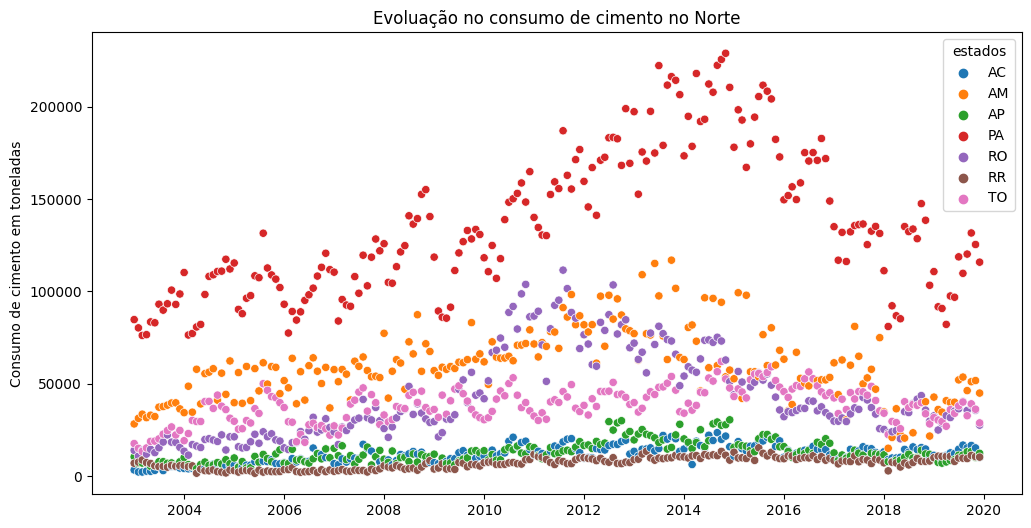

In [223]:
consumo = y.copy().reset_index(drop=True)
consumo["regiao"]=consumo["estados"].apply(lambda x : REGIOES[x])
plt.figure(figsize=(12,6))
sns.scatterplot(data=consumo[consumo["regiao"] == N], x="data", y="consumo", hue="estados")
plt.title("Evoluação no consumo de cimento no Norte")
plt.xlabel("")
plt.ylabel("Consumo de cimento em toneladas")
plt.show()

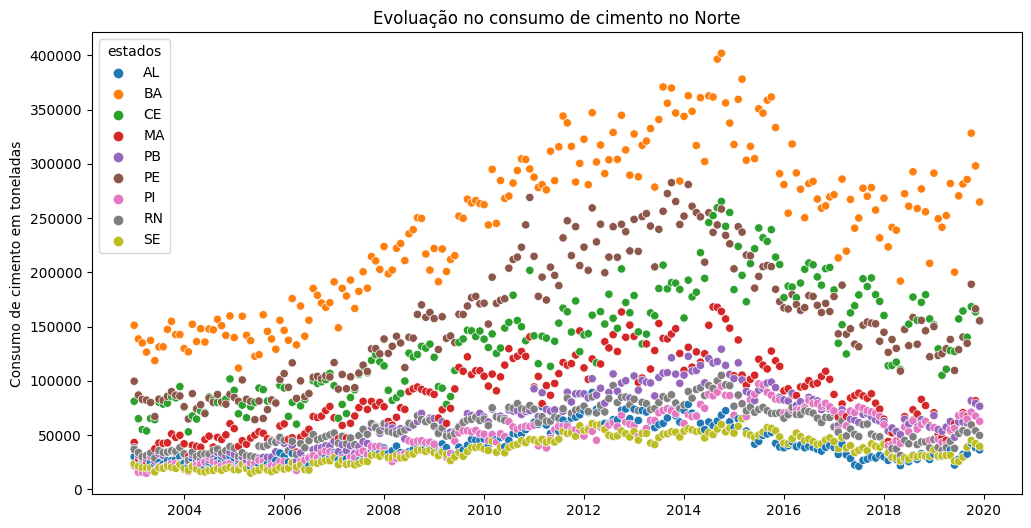

In [224]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=consumo[consumo["regiao"] == NE], x="data", y="consumo", hue="estados")
plt.title("Evoluação no consumo de cimento no Norte")
plt.xlabel("")
plt.ylabel("Consumo de cimento em toneladas")
plt.show()

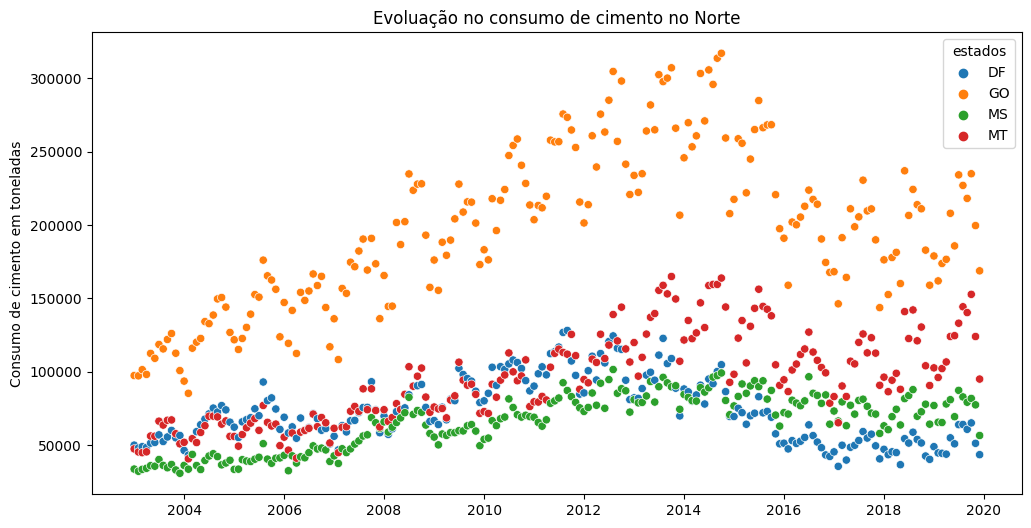

In [225]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=consumo[consumo["regiao"] == CO], x="data", y="consumo", hue="estados")
plt.title("Evoluação no consumo de cimento no Norte")
plt.xlabel("")
plt.ylabel("Consumo de cimento em toneladas")
plt.show()

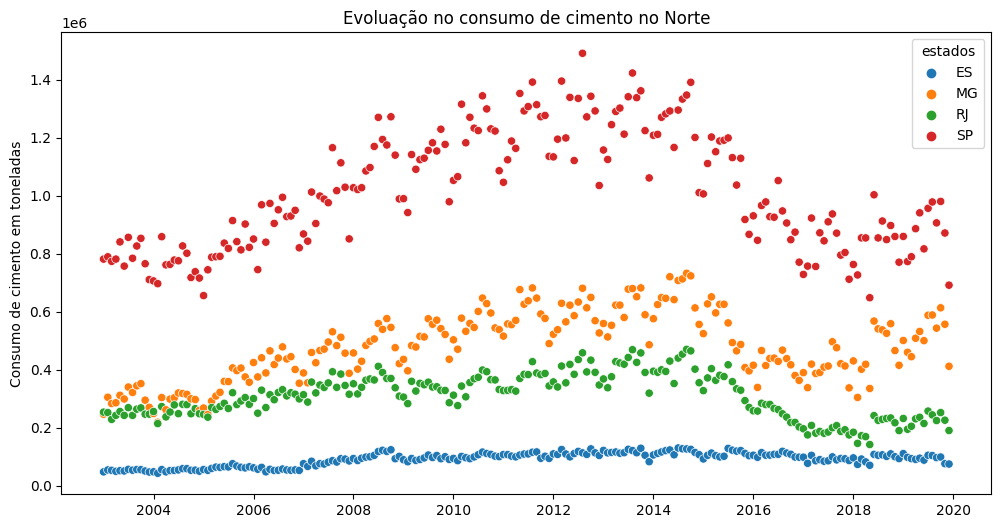

In [226]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=consumo[consumo["regiao"] == SE], x="data", y="consumo", hue="estados")
plt.title("Evoluação no consumo de cimento no Norte")
plt.xlabel("")
plt.ylabel("Consumo de cimento em toneladas")
plt.show()

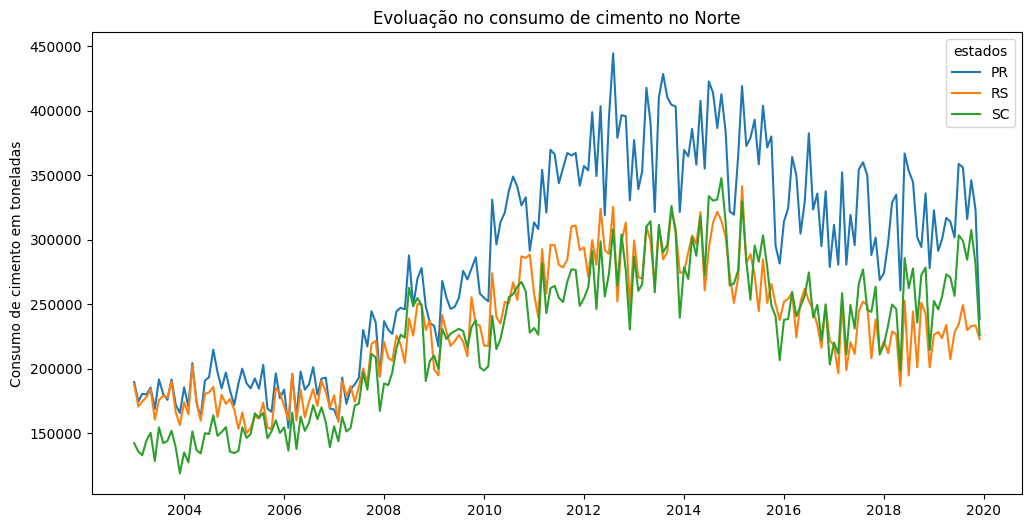

In [227]:
plt.figure(figsize=(12,6))
sns.lineplot(data=consumo[consumo["regiao"] == S], x="data", y="consumo", hue="estados")
plt.title("Evoluação no consumo de cimento no Norte")
plt.xlabel("")
plt.ylabel("Consumo de cimento em toneladas")
plt.show()

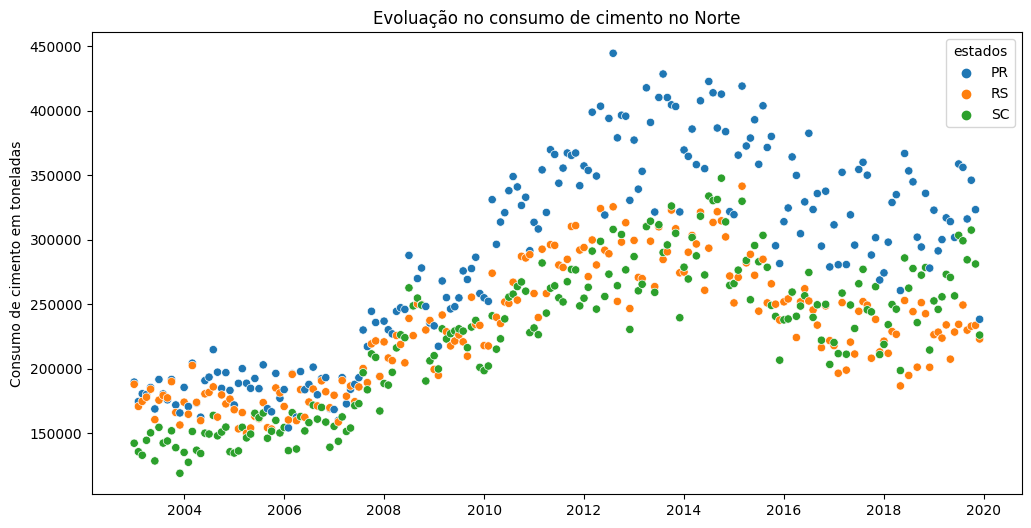

In [228]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=consumo[consumo["regiao"] == S], x="data", y="consumo", hue="estados")
plt.title("Evoluação no consumo de cimento no Norte")
plt.xlabel("")
plt.ylabel("Consumo de cimento em toneladas")
plt.show()

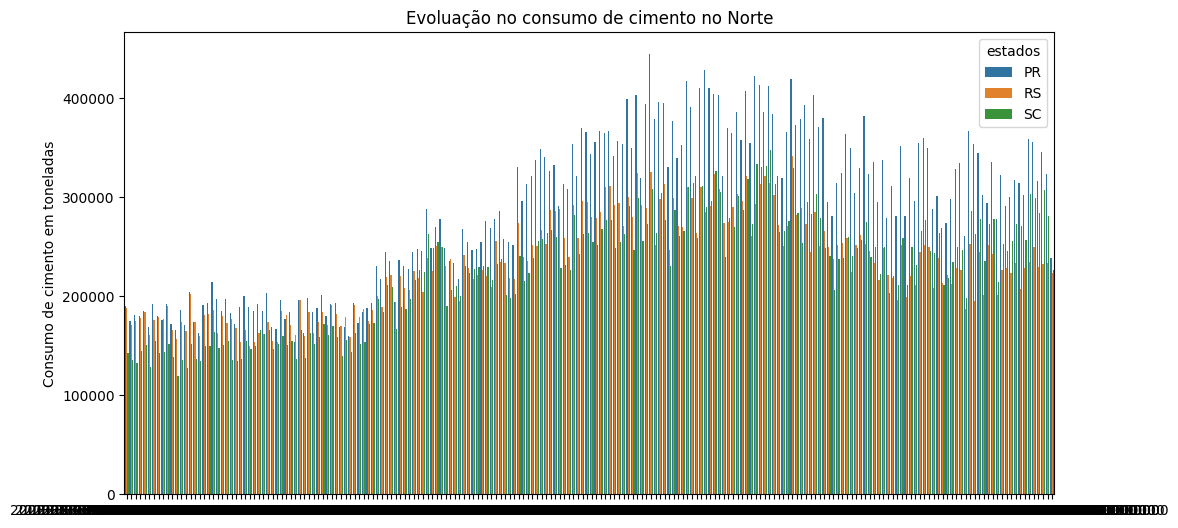

In [229]:
plt.figure(figsize=(12,6))
sns.barplot(data=consumo[consumo["regiao"] == S], x="data", y="consumo", hue="estados")
plt.title("Evoluação no consumo de cimento no Norte")
plt.xlabel("")
plt.ylabel("Consumo de cimento em toneladas")
plt.show()

In [230]:
consumo[consumo["data"].dt.year == 2014].sum()

C:\Users\julia\AppData\Local\Temp\ipykernel_11768\2851685429.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  consumo[consumo["data"].dt.year == 2014].sum()


estados    ACALAMAPBACEDFESGOMAMGMSMTPAPBPEPIPRRJRNRORRRS...
consumo                                             69836801
regiao     NORTENORDESTENORTENORTENORDESTENORDESTECENTRO ...
dtype: object

In [231]:
consumo.loc[(consumo["estados"] == "SP") & (consumo["data"].dt.year == 2014) & (consumo["data"].dt.month <= 6), "consumo"].sum()

7434831

In [232]:
consumo.loc[(consumo["estados"] == "SP") & (consumo["data"].dt.year == 2014) & (consumo["data"].dt.month > 6), "consumo"].sum()

7581691

In [233]:
y.columns

Index(['estados', 'data', 'consumo'], dtype='object')

In [238]:
y_semest = pd.DataFrame(columns=y.columns)

In [248]:
for year in range(2003,2020):
    
    for s in SIGLAS:
        
        y_semest.loc[len(y_semest)]=[s, pd.to_datetime(f"01{year}", format="%m%Y"), y.loc[(y["estados"] == s) & (y["data"].dt.year == year) & (y["data"].dt.month <= 6), "consumo"].sum()]
        y_semest.loc[len(y_semest)]=[s, pd.to_datetime(f"06{year}", format="%m%Y"), y.loc[(y["estados"] == s) & (y["data"].dt.year == year) & (y["data"].dt.month > 6), "consumo"].sum()]

In [250]:
y_semest=y_semest.sort_values(["data","estados"]).reset_index(drop=True)

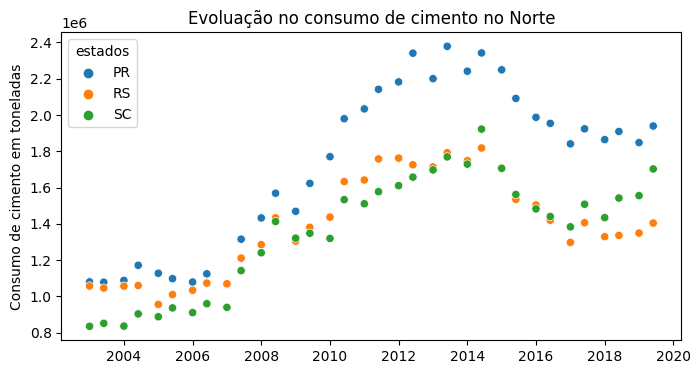

In [256]:
y_semest["regiao"]=y_semest["estados"].apply(lambda x : REGIOES[x])
plt.figure(figsize=(8,4))
sns.scatterplot(data=y_semest[y_semest["regiao"] == S], x="data", y="consumo", hue="estados")
plt.title("Evoluação no consumo de cimento no Norte")
plt.xlabel("")
plt.ylabel("Consumo de cimento em toneladas")
plt.show()

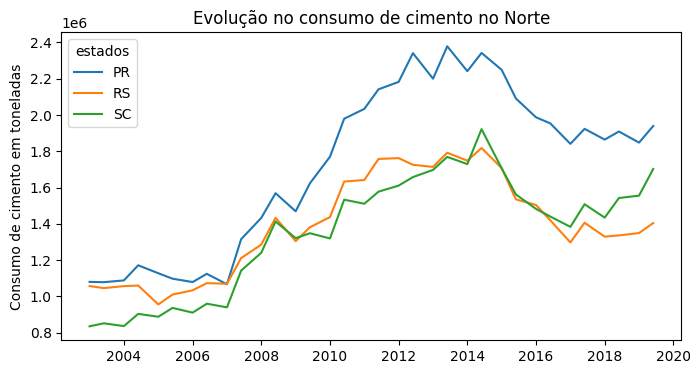

In [262]:
plt.figure(figsize=(8,4))
sns.lineplot(data=y_semest[y_semest["regiao"] == S], x="data", y="consumo", hue="estados")
plt.title("Evolução no consumo de cimento no Norte")
plt.xlabel("")
plt.ylabel("Consumo de cimento em toneladas")
plt.show()

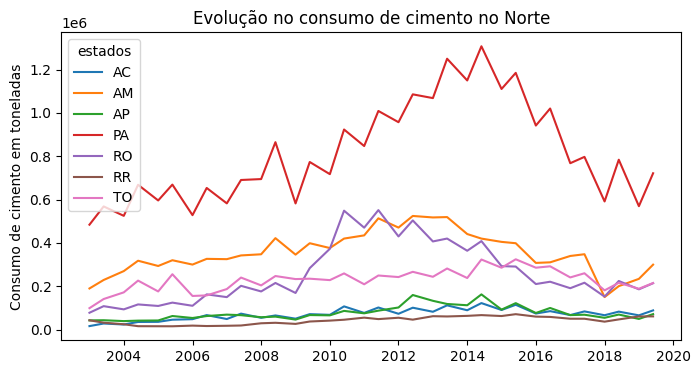

In [259]:
plt.figure(figsize=(8,4))
sns.lineplot(data=y_semest[y_semest["regiao"] == N], x="data", y="consumo", hue="estados")
plt.title("Evolução no consumo de cimento no Norte")
plt.xlabel("")
plt.ylabel("Consumo de cimento em toneladas")
plt.show()

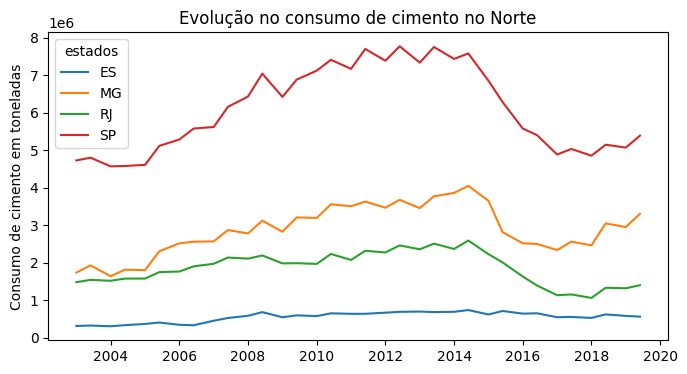

In [263]:
plt.figure(figsize=(8,4))
sns.lineplot(data=y_semest[y_semest["regiao"] == SE], x="data", y="consumo", hue="estados")
plt.title("Evolução no consumo de cimento no Norte")
plt.xlabel("")
plt.ylabel("Consumo de cimento em toneladas")
plt.show()